Importar bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
inicio = '2020-01-01'
fim = '2024-01-01'

In [3]:
# Função para simular carteira
def simulador_carteira(inicio, fim, carteira):
    precos_cotacao = yf.download(list(carteira.keys()), start=inicio, end=fim, progress=False)['Adj Close']
    primeiro_preco = precos_cotacao.iloc[0]
    carteira_df = pd.Series(data=carteira, index=(carteira.keys()))
    qtd_ativos = round(carteira_df / primeiro_preco, 0)
    pl = pd.DataFrame(data=(precos_cotacao.values * qtd_ativos.values), index=precos_cotacao.index, columns=list(carteira.keys()))
    pl['PL Total'] = pl.sum(axis='columns')
    ibov = yf.download('^BVSP', start=inicio, end=fim, progress=False)
    ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)
    ibov.drop(ibov.columns[[0, 1, 2, 3, 5]], axis=1, inplace=True)
    dado_consolidado = pd.merge(ibov, pl, how='inner', on='Date')
    dado_consolidado_adj = dado_consolidado / dado_consolidado.iloc[0]
    dado_consolidado_adj[['IBOV', 'PL Total']].plot(figsize=(8, 6));

In [13]:
portfolio = {'PETR4.SA': 10}

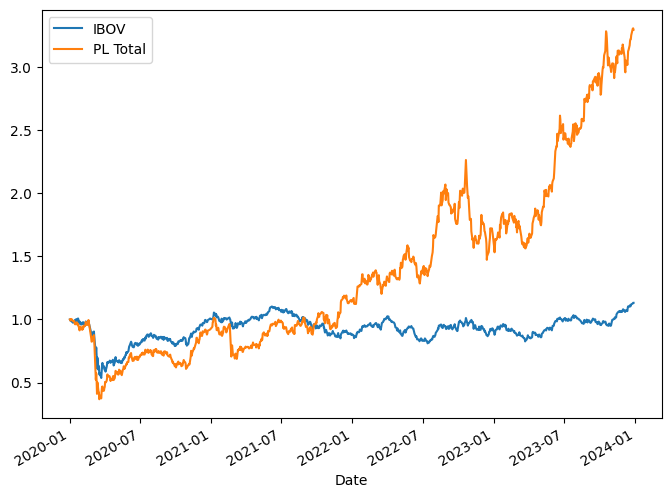

In [14]:
simulador_carteira(inicio, fim, portfolio)